In [ ]:
pip install scipy
pip install table_evaluator

In [1]:
import scipy
import pandas as pd

In [10]:
import mlflow
from table_evaluator import TableEvaluator
import warnings

In [46]:
variables = ['sex','age','agegr','placesize','edu','socprof','marital','ls','depress','trust','trustfam','trustneigh','sport','nofriend','smoke','alcabuse','alcsol','wkabint','englang','height','weight','bmi']
num = ['age', 'depress', 'nofriend', 'height', 'weight', 'bmi']

fac = ['sex','agegr','placesize','edu','socprof','marital','ls','trust','trustfam','trustneigh','sport','smoke','alcabuse','alcsol','wkabint','englang']

var_puf71 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","EXTRIAN","HALOR","HEFFEMP","HEFFTOT",
           "HHABEMP","HHABTOT","IDENT","ISCO2","METRODOM","MRANE","MRBNE","MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFANTG088N","NAFG004UN","NAFG010UN","NAFG017UN",
           "NAFG021UN","NAFG038UN","NAFG088UN","NOI","OFFICC","PASTRA","PASTRB","PCS1","PCS1Q","PCS2","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE",
           "SOU_C","SOUSEMPL","SOUSEMPLR","STATUT","STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

var_puf65 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","EXTRIAN","HALOR","HEFFEMP","HEFFTOT",
           "HHABEMP","HHABTOT","METRODOM","MRANE","MRBNE","MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFG004UN","NAFG010UN","NAFG017UN",
           "NAFG021UN","NOI","OFFICC","PASTRA","PASTRB","PCS1","PCS1Q","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE",
           "SOU_C","SOUSEMPL","SOUSEMPLR","STATUT","STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

fac_puf71 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","IDENT","ISCO2","METRODOM","MRANE","MRBNE",
           "MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFANTG088N","NAFG004UN","NAFG010UN","NAFG017UN","NAFG021UN","NAFG038UN","NAFG088UN","NOI","OFFICC","PASTRA","PASTRB",
           "PCS1","PCS1Q","PCS2","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE","SOU_C","SOUSEMPL","SOUSEMPLR","STATUT",
           "STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

fac_puf65 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","METRODOM","MRANE","MRBNE",
           "MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFG004UN","NAFG010UN","NAFG017UN","NAFG021UN","NOI","OFFICC","PASTRA","PASTRB",
           "PCS1","PCS1Q","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE","SOU_C","SOUSEMPL","SOUSEMPLR","STATUT",
           "STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

In [88]:
original = pd.read_csv("df_original.csv", names = variables)
ctgan = pd.read_csv('ctgan_best.csv', names = variables, header = 0)
cart = pd.read_csv("df1_cart.csv", names = variables)
ctree = pd.read_csv("df1_ctree.csv", names = variables)
parametric = pd.read_csv("df1_parametric.csv", names = variables)
rf = pd.read_csv("df1_rf.csv", names = variables)
bag = pd.read_csv("df1_bag.csv", names = variables)
sample = pd.read_csv("df1_sample.csv", names = variables)
tvae = pd.read_csv("tvae_best.csv", names = variables, header = 0)
puf65 = pd.read_csv("puf.csv", names = var_puf65)
puf65 = puf65.iloc[1:]
puf71 = pd.read_csv("puf71.csv", names = var_puf71)
puf71 = puf71.iloc[1:]
puf_test = pd.read_csv("puf_test.csv", names = var_puf65)
puf_cart = pd.read_csv("puf_cart.csv", names = var_puf65)
puf65_tvae = pd.read_csv("puf65_tvae.csv", names = var_puf65)
puf65_tvae = puf65_tvae.iloc[1:]
puf71_tvae = pd.read_csv("puf71_tvae.csv", names = var_puf71)
puf71_tvae = puf71_tvae.iloc[1:]

In [83]:
puf65.iloc[0]

AAC           1
ACTEU         3
AGE6         65
ANCCHOM     999
ANCEMPL4    999
           ... 
TEMP        999
TPPRED      999
TRAREF        2
TXTPPRED    999
TYPLOG5       1
Name: 1.0, Length: 65, dtype: object

In [99]:
puf65_tvae.shape

(88589, 65)

In [102]:
num = ["EXTRIAN", "HEFFEMP", "HEFFTOT", "HHABEMP", "HHABTOT"]

fac_puf71 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","IDENT","ISCO2","METRODOM","MRANE","MRBNE",
           "MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFANTG088N","NAFG004UN","NAFG010UN","NAFG017UN","NAFG021UN","NAFG038UN","NAFG088UN","NOI","OFFICC","PASTRA","PASTRB",
           "PCS1","PCS1Q","PCS2","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE","SOU_C","SOUSEMPL","SOUSEMPLR","STATUT",
           "STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

fac_puf65 = ["AAC","ACTEU","AGE6","ANCCHOM","ANCEMPL4","ANCSSEMP","CHPUB","CL_EMPLOI","COUPL_LOG","DEMNE","DIP7","DISPONE","DISPPLC","ENFRED","HALOR","METRODOM","MRANE","MRBNE",
           "MRCNE","MRDNE","MRENE","MRFNE","MRGNE","MRHNE","MRINE","MRJNE","NAFANTG004N","NAFG004UN","NAFG010UN","NAFG017UN","NAFG021UN","NOI","OFFICC","PASTRA","PASTRB",
           "PCS1","PCS1Q","PUB3FP","RABS","RAISDISPPLC","RAISNDISPONE","RAISNRECNE","RAISNSOUNE","RAISTP","RECNE","SALTYP","SEXE","SOU_C","SOUSEMPL","SOUSEMPLR","STATUT",
           "STATUTDET","STC","STCOMM2020","STPLC","TEMP","TPPRED","TRAREF","TXTPPRED","TYPLOG5"]

for colonne in num:
    puf_cart[colonne] = pd.to_numeric(puf_cart[colonne], errors='coerce')
    puf71[colonne] = pd.to_numeric(puf71[colonne], errors='coerce')
    puf65[colonne] = pd.to_numeric(puf65[colonne], errors='coerce')
    puf65_tvae[colonne] = pd.to_numeric(puf65_tvae[colonne], errors='coerce')
    puf71_tvae[colonne] = pd.to_numeric(puf71_tvae[colonne], errors='coerce')

for colonne in fac_puf65:
    puf65_tvae[colonne] = puf65_tvae[colonne].astype(str)
    puf65[colonne] = puf65[colonne].astype(str)
    
for colonne in fac_puf71:
    puf71_tvae[colonne] = puf71_tvae[colonne].astype(str)



In [94]:
#evaluator_cart = TableEvaluator(original, cart, cat_cols = fac)
#evaluator_ctree = TableEvaluator(original, ctree, cat_cols = fac)
#evaluator_parametric = TableEvaluator(original, parametric, cat_cols = fac)
#evaluator_rf = TableEvaluator(original, rf, cat_cols = fac)
#evaluator_bag = TableEvaluator(original, bag, cat_cols = fac)
#evaluator_sample = TableEvaluator(original, sample, cat_cols = fac)
#evaluator_ctgan = TableEvaluator(original, ctgan, cat_cols = fac)
#evaluator_tvae = TableEvaluator(original, tvae, cat_cols = fac)
#evaluator_puf = TableEvaluator(puf, puf_test, cat_cols = fac_puf65)
#evaluator_puf_cart = TableEvaluator(puf, puf_cart, cat_cols = fac_puf65)
evaluator_puf65_tvae = TableEvaluator(puf65, puf65_tvae, cat_cols = fac_puf65)
#evaluator_puf71_tvae = TableEvaluator(puf71, puf71_tvae, cat_cols = fac_puf71)

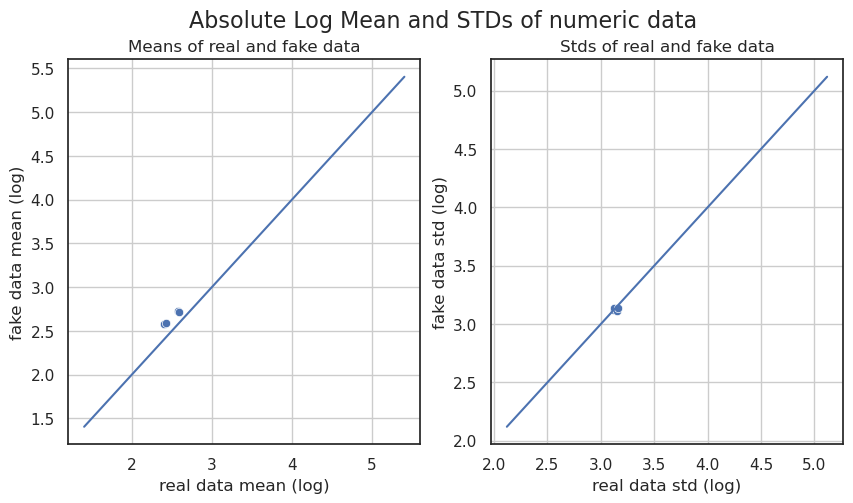

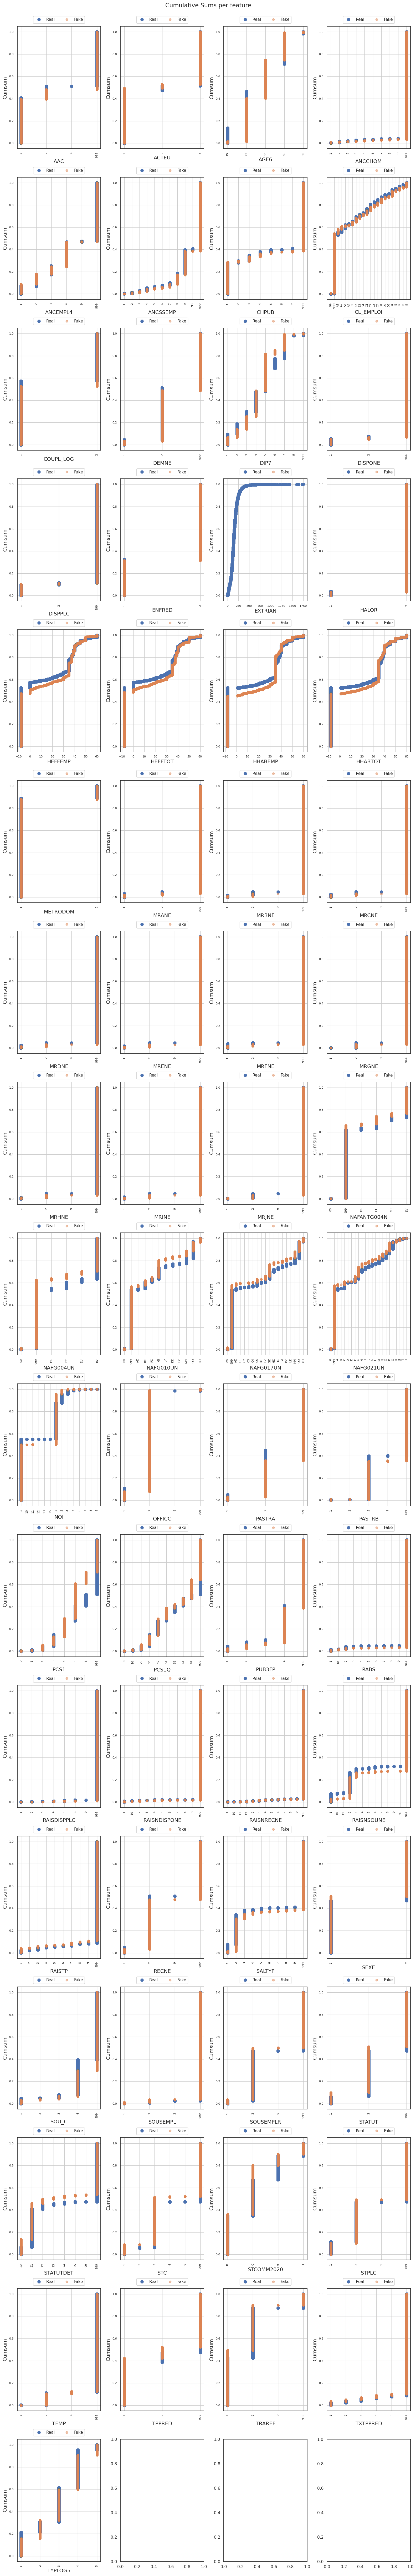

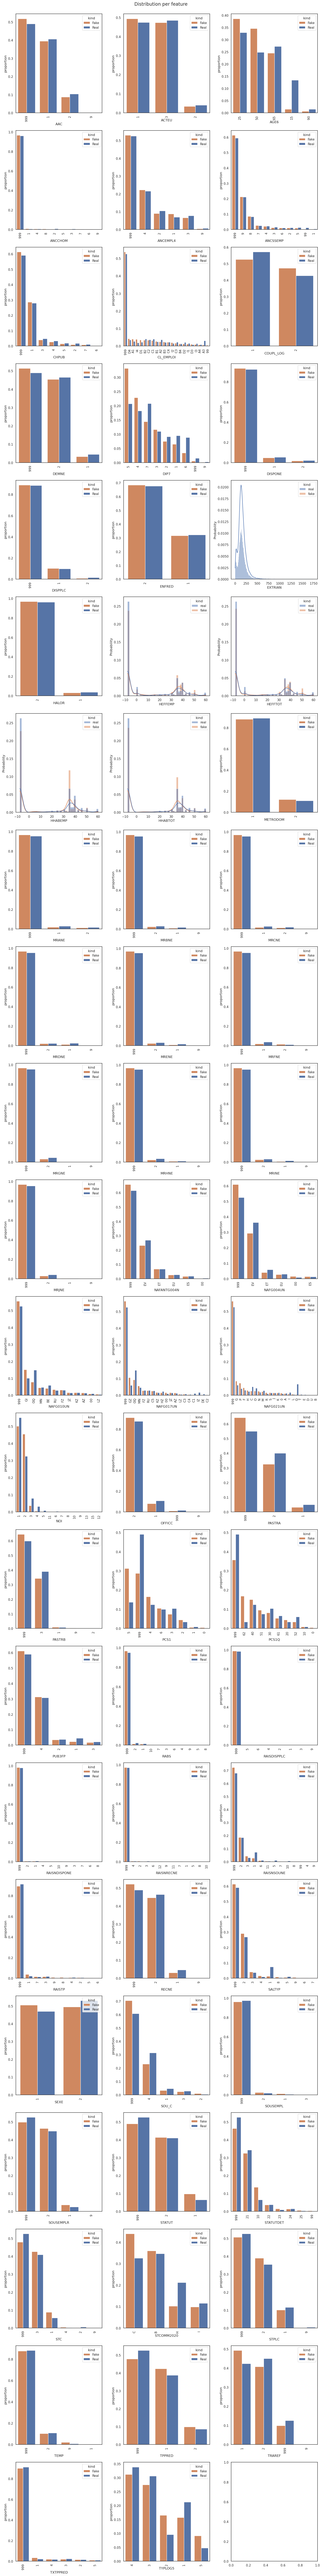

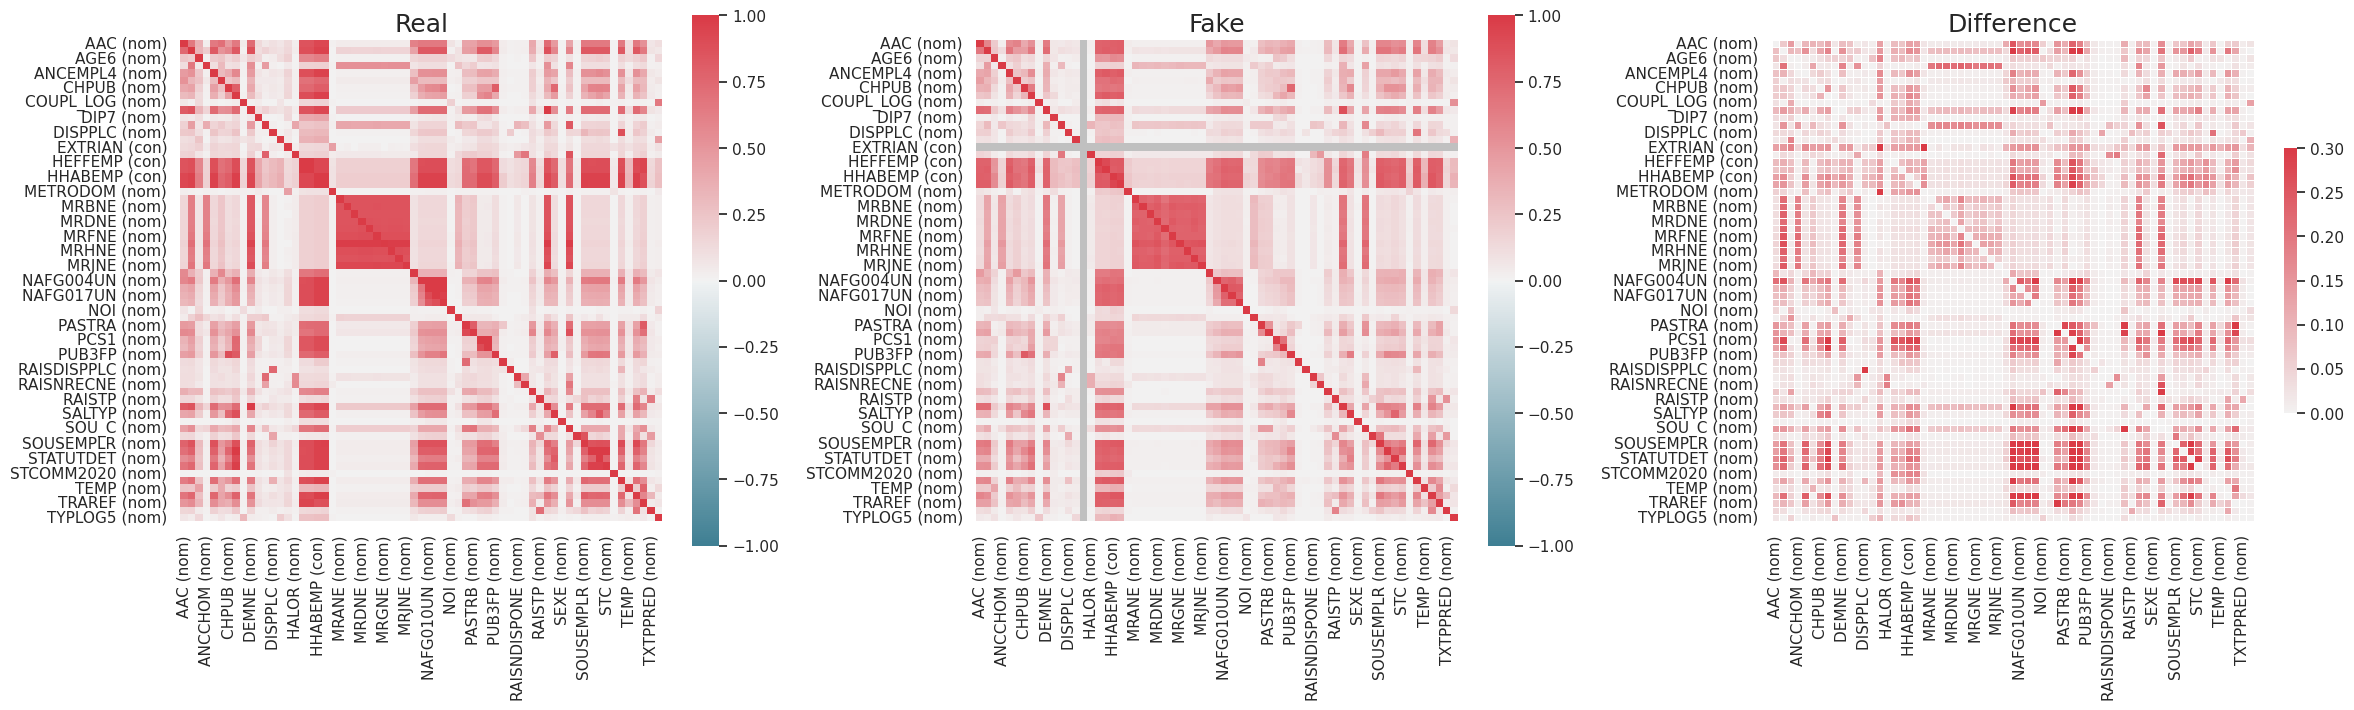

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [95]:
warnings.filterwarnings("ignore")

#evaluator_cart.visual_evaluation()
#evaluator_ctree.visual_evaluation()
#evaluator_parametric.visual_evaluation()
#evaluator_rf.visual_evaluation()
#evaluator_bag.visual_evaluation()
#evaluator_sample.visual_evaluation()
#evaluator_ctgan.visual_evaluation()
#evaluator_tvae.visual_evaluation()
#evaluator_puf.visual_evaluation()
#evaluator_puf_cart.visual_evaluation()
evaluator_puf65_tvae.visual_evaluation()
#evaluator_puf71_tvae.visual_evaluation()
#evaluator_ctgan.plot_correlation_difference(fname="correlation_ctgan.png")
#evaluator_tvae.plot_distributions(fname="distributions_tvae.png")

Les deux premiers graphiques représentent les logarithmes absolu de la moyenne et de l'écart-type de chaque variables numériques.

Matrice corrélations :
- Continue - Continue : utilise le coefficient de corrélation de Pearson $\frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2\sum(y_i -\bar{y})^2}} \in [-1,1]$
- Continue - Catégorielle : utilise le rapport de corrélation $\eta^2(y,x) = \frac{SCE_{inter}}{SCE_{intra}} \in [0,1]$ avec $SCE_{intra} = \sum_j\sum_{i \in J_j}(y_{ij} - \bar{y}_{.j})^2$ qui est la variabilité intra-classe et $SCE_{inter} = \sum_j\sum_{i \in J_j}(\bar{y}_{.j} - \bar{y})^2$ qui est la variabilité inter-classe
- Catégorielle - Catégorielle : utilise le U de Theil, une métrique de corrélation asymétrique pour les associations catégorielles défini par $U(X|Y) = \frac{H(X) - H(X|Y)}{H(X)} \in [0,1]$ avec $H(X) = -\sum_x P_X(x)\log P_X(x)$ et $H(X|Y) = -\sum_{x,y}P_{X,Y}(x,y)\log P_{X|Y}(x|y)$

Cart : 
- Les moyennes et écarts types des variables numériques sont très proches après transformation logarithmique.
- Les corrélations entre variables sont bien reproduites dans les données synthétiques.
- La structure globale des données, telle que capturée par les deux premières composantes principales, est conservée dans les données synthétiques.

Ctree : Pareil

Parametric : 
- On constate une différence dans la variabilité des variables numériques entre les données originales et les données synthétiques.
- On apperçoit également dans la matrice des différences des cases plus foncées indiquant une plus grande différence dans les corrélations
- Les individus ont une représentation différente dans le premier plan factoriel
- Le modèle parametric est globalement moins bon que cart et ctree.

Rf :
- Plus grandes différences dans les effectifs de chaque variables par rapport aux autres modèles
- Il y a une assez grande différence dans les corrélations concernant la variable depress

Bag :
- Quelques différences au niveau des effectifs de cretaines variables

Sample :
- Est assez bon jusqu'à ce qu'on arrive aux corrélations qui sont catastrophiques tout comme la représentation dans le premier plan factoriel 